# Curso Sklearn: Regressão, Classificação e Clustering

In [1]:
#importando o pacote
import pandas as pd

In [2]:
#carregando os dados
passageiros = pd.read_csv("dados/Passageiros.csv")

In [3]:
passageiros.head()

,tempo,nPassageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [4]:
#verificar num gráfico
import seaborn as sns

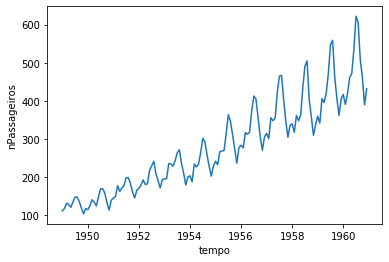

In [5]:
sns.lineplot(x="tempo", y="nPassageiros", data = passageiros)

In [6]:
tempo = passageiros.iloc[:,:-1].values
tempo
#ou
#tempo = passageiros["tempo"].values


array([[1949.        ],
       [1949.08333333],
       [1949.16666667],
       [1949.25      ],
       [1949.33333333],
       [1949.41666667],
       [1949.5       ],
       [1949.58333333],
       [1949.66666667],
       [1949.75      ],
       [1949.83333333],
       [1949.91666667],
       [1950.        ],
       [1950.08333333],
       [1950.16666667],
       [1950.25      ],
       [1950.33333333],
       [1950.41666667],
       [1950.5       ],
       [1950.58333333],
       [1950.66666667],
       [1950.75      ],
       [1950.83333333],
       [1950.91666667],
       [1951.        ],
       [1951.08333333],
       [1951.16666667],
       [1951.25      ],
       [1951.33333333],
       [1951.41666667],
       [1951.5       ],
       [1951.58333333],
       [1951.66666667],
       [1951.75      ],
       [1951.83333333],
       [1951.91666667],
       [1952.        ],
       [1952.08333333],
       [1952.16666667],
       [1952.25      ],
       [1952.33333333],
       [1952.416

In [7]:
npassageiros =passageiros.iloc[:,1].values
#ou
#npassageiros = passageiros["nPassageiros"].values

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
tempo_treino, tempo_teste, npassageiros_treino, npassageiros_teste = train_test_split(tempo,npassageiros,test_size = 0.3)

In [10]:
from sklearn import linear_model

In [13]:
regressor = linear_model.LinearRegression()

In [14]:
regressor.fit(tempo_treino, npassageiros_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
npassageiros_predito = regressor.predict(tempo_teste)

In [14]:
npassageiros_predito

array([265.45403712, 357.97120358, 439.60399751, 121.23610117,
       102.18844925, 322.59699287, 390.62432115, 311.71262035,
       330.76027226, 442.32509064, 243.68529207, 260.01185085,
       249.12747833, 254.56966459, 153.88921874, 404.2297868 ,
       240.96419894,  91.30407673, 126.67828743, 175.65796379,
       336.20245853, 431.44071812, 115.79391491, 110.35172864,
       213.75326763, 352.52901731, 159.331405  , 377.01885549,
       156.61031187, 172.93687066, 104.90954238, 450.48837003,
       284.50168903,  94.02516986,  85.86189046, 194.70561571,
       178.37905692, 396.06650741, 181.10015005, 164.77359127,
       363.41338984, 344.36573792, 230.07982641, 472.25711508])

In [18]:
import numpy as np

In [16]:
 passageiros_predito = pd.DataFrame({'Tempo':np.ndarray.flatten(tempo_teste),'nPassageiros':npassageiros_predito})

In [17]:
 passageiros_teste = pd.DataFrame({'Tempo':np.ndarray.flatten(tempo_teste),'nPassageiros':npassageiros_teste})

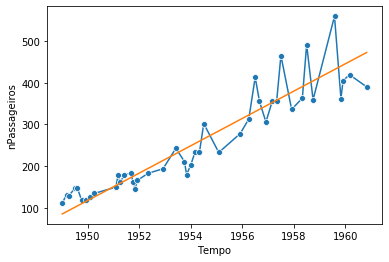

In [18]:
sns.lineplot(x="Tempo", y='nPassageiros',data = passageiros_teste,marker = "o")
sns.lineplot(x="Tempo", y='nPassageiros',data = passageiros_predito)


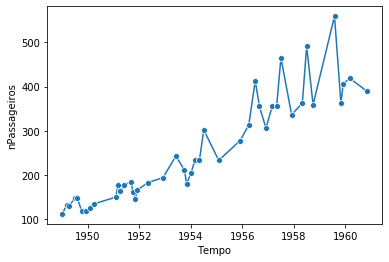

In [19]:
sns.lineplot(x="Tempo", y='nPassageiros',data = passageiros_teste,marker = "o")

In [20]:
# coeficiente angular da reta
regressor.coef_

array([32.65311757])

In [21]:
# intercepto
regressor.intercept_

-63555.064260142804

In [22]:
# Coeficiente de Determinação

In [23]:
from sklearn.metrics import r2_score

In [24]:
 r2_score(npassageiros_teste,npassageiros_predito)

0.851786625585601

# SVM ( Suport Vector Machines)

In [25]:
 # pega um dado em um dominio com poucas dimensões (x,y) e passa para um domínio com mais dimensões (x1,x2,x3..), para trabalhar de forma linear

In [26]:
from sklearn.svm import SVR

In [27]:
regressor_svr = SVR(C=10000,gamma='auto')

In [28]:
regressor_svr.fit(tempo_treino,npassageiros_treino)

SVR(C=10000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [29]:
npassageiros_predito_svr = regressor_svr.predict(tempo_teste)

In [30]:
 passageiros_predito_svr = pd.DataFrame({'Tempo':np.ndarray.flatten(tempo_teste),'nPassageiros':npassageiros_predito_svr}) 

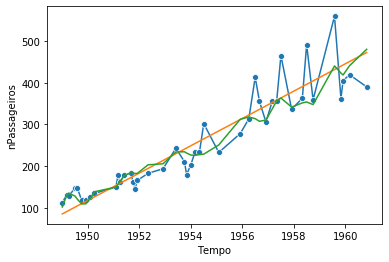

In [31]:
sns.lineplot(x="Tempo", y='nPassageiros',data = passageiros_teste,marker = "o")
sns.lineplot(x="Tempo", y='nPassageiros',data = passageiros_predito)
sns.lineplot(x="Tempo", y='nPassageiros',data = passageiros_predito_svr)


In [32]:
r2_score(npassageiros_teste,npassageiros_predito_svr)

0.8585106941423

# Classificação 

## Imagine que trabalhamos em uma telefonia, e esta telefonia coletou uma série de informações de clientes e alem disso, coletou o plano de celular

In [20]:
#carregando base de dados
celular = pd.read_csv("dados/Celular.csv",delimiter=",")

In [21]:
celular

,salario,economias,idade,dividas,plano
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


In [22]:
celular

,salario,economias,idade,dividas,plano
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


In [23]:
celular.shape

(150, 5)

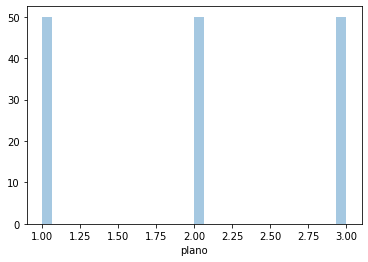

In [24]:
sns.distplot(celular['plano'],bins = 30,kde=False)

In [25]:
x = celular.iloc[:,:-1].values
#ou
#x =celular[["salario","economias","idade","dividas"]].values

In [26]:
y=celular.iloc[:,4]
#ou
#y= celular["plano"].values

In [27]:
x_treino,x_teste,y_treino,y_teste = train_test_split(x,y,test_size=0.3)

## Árvores de Decisão

In [28]:
from sklearn import tree

In [29]:
classificador_arvore = tree.DecisionTreeClassifier()

In [30]:
classificador_arvore.fit(x_treino,y_treino)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [31]:
import graphviz

In [32]:
dot_data = tree.export_graphviz(classificador_arvore,filled=True,out_file = None)

In [33]:
graph = graphviz.Source(dot_data)

In [37]:
type(x_treino)

numpy.ndarray

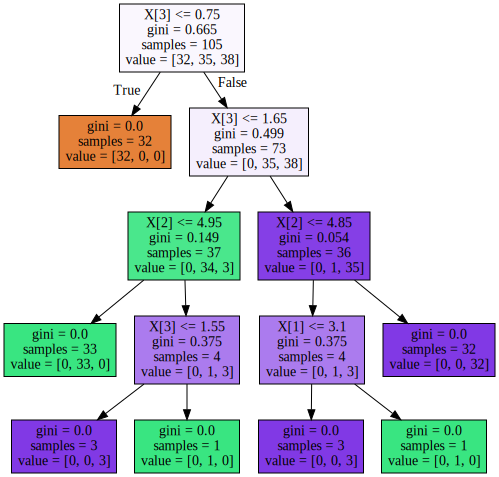

In [34]:
graph

In [38]:
plano_previsto = classificador_arvore.predict(x_teste)

In [39]:
plano_previsto

array([2, 2, 2, 1, 2, 2, 3, 2, 2, 1, 1, 1, 3, 1, 2, 1, 3, 1, 3, 3, 3, 3,
       3, 1, 1, 1, 1, 2, 1, 1, 1, 3, 2, 3, 2, 1, 1, 1, 2, 2, 3, 2, 3, 2,
       1], dtype=int64)

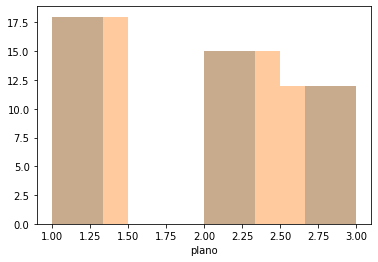

In [40]:
sns.distplot(y_teste,bins=6,kde=False)
sns.distplot(plano_previsto,bins=4,kde=False)

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(y_teste,plano_previsto)*100

95.55555555555556

## K Vizinhos mais próximos 

#### Um outro método de classificação, nesse método nós medimos a distância espacial entre o ponto que queremos saber a classe e os k vizinhos mais próximoas das outras classes. Os K vizihos mais próximos não podem ser mútiplo dos números de classes, nem iguais ao número de classes


In [43]:
#importando a biblioteca
from sklearn.neighbors import KNeighborsClassifier

In [44]:
#já que possuímos 3 classes no nosso problema, optaremos por 5 vizinhos
classificador_vizinho = KNeighborsClassifier(5)

In [45]:
classificador_vizinho.fit(x_treino, y_treino)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [46]:
plano_previsto_v = classificador_vizinho.predict(x_teste)
plano_previsto_v

array([2, 2, 2, 1, 2, 2, 3, 2, 2, 1, 1, 1, 3, 1, 2, 1, 3, 1, 3, 3, 3, 3,
       3, 1, 1, 1, 1, 2, 1, 1, 1, 3, 2, 3, 2, 1, 1, 1, 2, 2, 3, 2, 3, 3,
       1], dtype=int64)

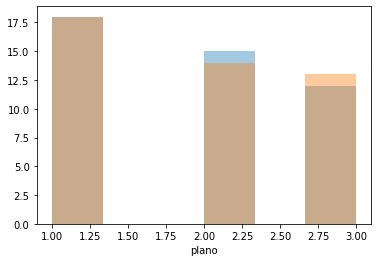

In [47]:
sns.distplot(y_teste,bins=6,kde=False)
sns.distplot(plano_previsto_v,bins=6,kde=False)

In [48]:
accuracy_score(y_teste,plano_previsto_v)*100

97.77777777777777

# Sobreajuste (overfitting) e divisão em treino e teste

In [49]:
plano_previsto_v2 = classificador_vizinho.predict(x_treino)

In [50]:
#fazendo o ajuste nos dados de treino, obvio que a acuracia vai ser maior fazendo a previsão nos dados de treino, pois usamos estes para treinar nosso modelo. 
accuracy_score(y_treino,plano_previsto_v2)*100
#o problema é quando existe uma discrepância na acuracia dos dados de teste e dados de treino. 

96.19047619047619

In [51]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [52]:
#utilizar uma função que estratifica nossa base de dados para que utilizemos uma parte de cada vez como dados de teste, para no final termos o melhor resultado possivel
skfold = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 10,random_state = 0)

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
params = {'n_neighbors':[5]}

In [55]:
#função para percorrermos as repetições
gs = GridSearchCV(estimator = KNeighborsClassifier(),param_grid = params,cv=skfold,verbose=1,scoring="accuracy",return_train_score=True)

In [56]:
gs.fit(x,y)

Fitting 100 folds for each of 1 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished


GridSearchCV(cv=<sklearn.model_selection._split.RepeatedStratifiedKFold object at 0x0000022317767358>,
             error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None, param_grid={'n_neighbors': [5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [57]:
gs.cv_results_['mean_test_score']

array([0.96533333])

# Clustering

#### As vezes temps um problema de agrupamento, onde não conhecemos cada grupo(classes), porém queremos saber como determinar cada grupo

In [58]:
#carregando base de dados
engajamento = pd.read_csv("dados/Engajamento.csv")

In [59]:
engajamento.head()

,Horas,Taxa de Cliques,Classe
0,1007.084589,1.582099,1
1,1005.886193,1.524809,1
2,1005.609471,0.846857,1
3,989.814354,2.841944,2
4,995.328807,3.569900,3


In [62]:
x = engajamento.iloc[:,:-1]
x
#ou
#engajamento[["Horas","Taxa de Cliques"]]

,Horas,Taxa de Cliques
0,1007.084589,1.582099
1,1005.886193,1.524809
2,1005.609471,0.846857
3,989.814354,2.841944
4,995.328807,3.569900
5,1007.122707,1.510663
6,996.717789,16.129410
7,990.871518,3.313321
8,997.425243,16.065154
9,989.730475,3.700035


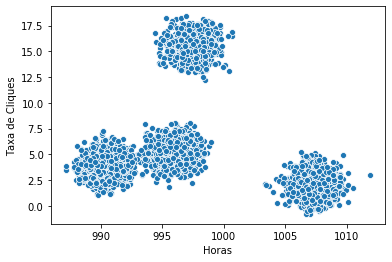

In [63]:
sns.scatterplot(x = 'Horas',y = "Taxa de Cliques", data = x )

## Kmeans

#### Não sabemos de antemão uma classe. Podemos passar por um problema em que temos que fornecer primeiro quantas classes achamos que tem no banco de dados. Nesse caso, vou chutar três. Assim, a primeira coisa que o computador faz é escolher aleatoriamente a posição delas. Aí sim o procedimento é parecido com o dos k vizinhos mais próximos. Classifico pela distância.

In [67]:
from sklearn.cluster import KMeans

In [68]:
kmeans = KMeans(n_clusters = 2, random_state = 0)

In [69]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [70]:
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0])

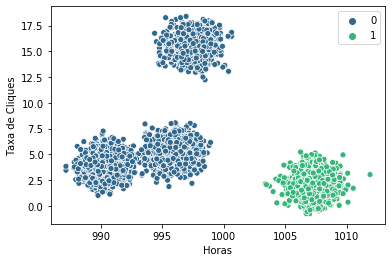

In [71]:
sns.scatterplot(x='Horas',y='Taxa de Cliques',data=x,hue = kmeans.labels_,palette = 'viridis')

In [72]:
kmeans = KMeans(n_clusters = 4,random_state = 0)

In [73]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

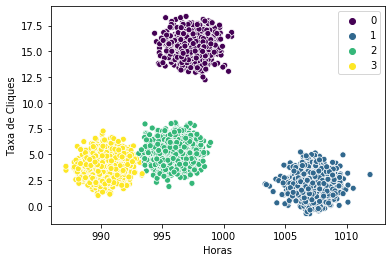

In [74]:
sns.scatterplot(x='Horas',y='Taxa de Cliques',data=x,hue = kmeans.labels_,palette = 'viridis')

#### Outra opção de algoritmo é o optics. Ele funciona de forma diferente. Eu não preciso passar o número de grupos de antemão. Preciso informar quantos elementos tenho por grupo. Se eu informar três, por exemplo, ele vai dividir assim. Vamos tentar aplicar esse algoritmo.

In [76]:
from sklearn.cluster import OPTICS

In [83]:
clustering_o = OPTICS(min_samples=800).fit(x)

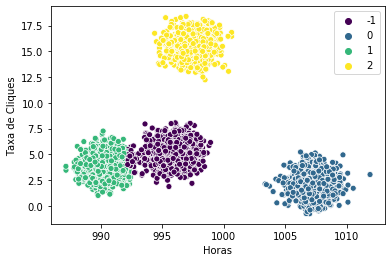

In [84]:
sns.scatterplot(x = "Horas",y="Taxa de Cliques",data = x, hue =clustering_o.labels_,palette='viridis')

##### No kmeans entramos com o número de grupos no OPTICS entramos com o numeros de elesmentos em cada grupo

##### No caso da regressão e da classificação tínhamos um alvo y em que tínhamos como verificar se a regressão ou classificação estavam funcionando razoavelmente bem. Mas aqui não temos. Removemos nossa classe. É comum em problemas de agrupamento. A primeira coisa que podemos fazer é uma interpretação visual. No caso, como aqui, em que conseguimos enxergar de forma 2D os grupos. Outra forma é ter o alvo de certa forma. Vamos ter o problema separado, que vai ser mais ou menos parecido com o problema que vamos analisar posteriormente e queremos ter uma ideia se vai funcionar.  Nesse caso, tendo o alvo, só temos um problema. Precisamos de algo que vai verificar a similaridade dos vetores de labels. Para fazer isso, existe uma métrica no sklearn.

In [88]:
from sklearn import metrics

In [89]:
Classe_conhecida = engajamento['Classe']

In [90]:
Classe_estimada = clustering_o.labels_

In [96]:
#verificando se o agrupamento funcionou para o OPTICS
metrics.adjusted_rand_score(Classe_conhecida,Classe_estimada)

0.9957444328155858

In [93]:
Classe_estimada = kmeans.labels_

In [95]:
#verificando se o agrupamento funcionou para o Kmeans
metrics.adjusted_rand_score(Classe_conhecida,Classe_estimada)

0.9957444328155858

##### Para casos que não conhecemos as classes de primeira mão, precisamos de um tipo de medida, e essa medida se chama 'silhouette' que é capaz de calcular o quão bem definidos os grupos são. Se temos um valor dessa metrica alto, quer dizer que temos valores dos grupos bem definidos

In [97]:
metrics.silhouette_score(x, kmeans.labels_,metric = 'euclidean')

0.7640009351490763

In [98]:
metrics.silhouette_score(x, clustering_o.labels_,metric = 'euclidean')

0.7590075270703337